In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()

In [2]:
df_titanic = pd.read_csv("Datasets/titanic.csv")

In [3]:
df_titanic.shape

(891, 12)

In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [8]:
df_titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [9]:
df_titanic['Survived'] = pd.Categorical(df_titanic['Survived'])

df_titanic['Embarked'] = df_titanic['Embarked'].fillna('Unknown')
df_titanic['Embarked'] = pd.Categorical(df_titanic['Embarked'])

In [10]:
df_titanic['Embarked'].unique()
df_titanic['Survived'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [11]:
df_titanic['Survived'] = df_titanic['Survived'].cat.rename_categories(['Dead','Survived'])
df_titanic['Embarked'] = df_titanic['Embarked'].cat.rename_categories(['Southampton', 'Cherbourg', 'Queenstown', 'Unknown'])

In [12]:
## How many dead versus survived?
    ## How many were men versus women?
    ## What was the distribution of the age group?
    ## How many had parents or children?
    ## How many had siblings or spouses?
    ## Which ports did they embark from?
    ## Which class were they in?

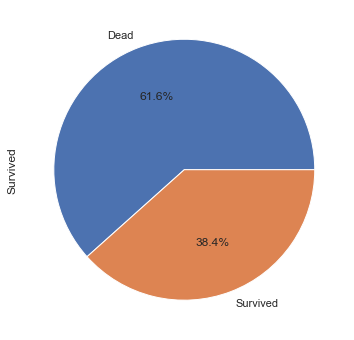

In [13]:
plt.figure(figsize=(8,6))
df_titanic['Survived'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

### Using crosstab

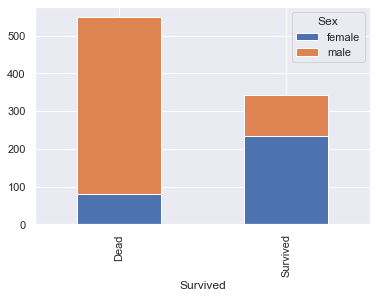

In [14]:
pd.crosstab(df_titanic['Survived'], df_titanic['Sex']).plot(kind='bar', stacked=True)

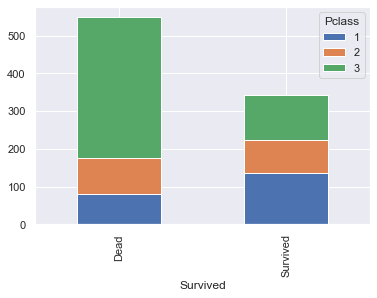

In [15]:
pd.crosstab(df_titanic['Survived'], df_titanic['Pclass']).plot(kind='bar', stacked=True)

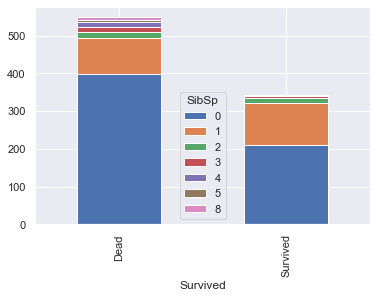

In [16]:
pd.crosstab(df_titanic['Survived'], df_titanic['SibSp']).plot(kind='bar', stacked=True)

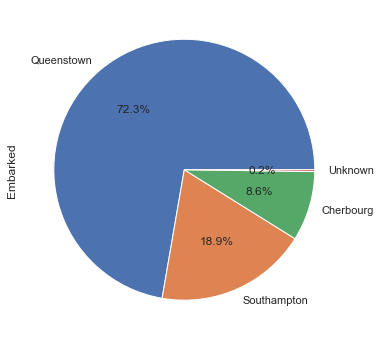

In [17]:
plt.figure(figsize = (8,6))
df_titanic['Embarked'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

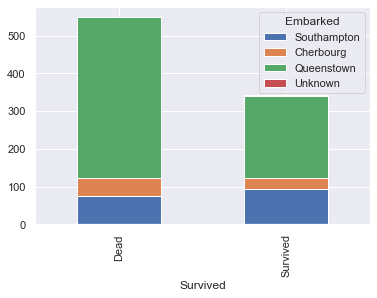

In [18]:
pd.crosstab(df_titanic['Survived'], df_titanic['Embarked']).plot(kind = 'bar', stacked = True)

In [19]:
df_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([24., 20., 10., 14., 10., 35., 67., 67., 72., 65., 64., 49., 40.,
        35., 27., 26., 25., 14., 15.,  9., 11.,  7.,  1.,  5.,  1.,  0.]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57, 60, 63, 66, 69, 72, 75, 78]),
 <a list of 26 Patch objects>)

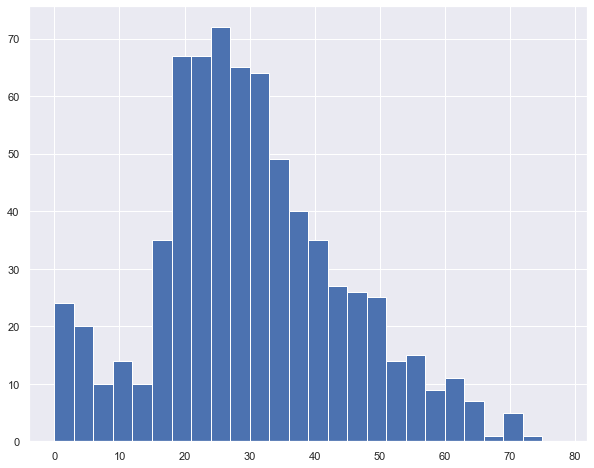

In [20]:
import numpy as np

plt.figure(figsize = (10,8))
plt.hist(df_titanic['Age'], bins = np.arange(0,81,3))

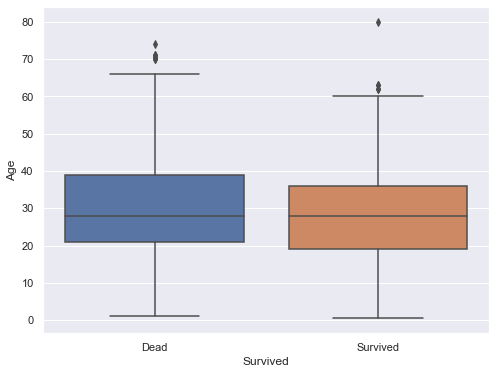

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y ='Age', data=df_titanic)

### Using ggplot

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Queenstown
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Southampton
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Queenstown
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Queenstown
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Queenstown


In [23]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 71.8+ KB


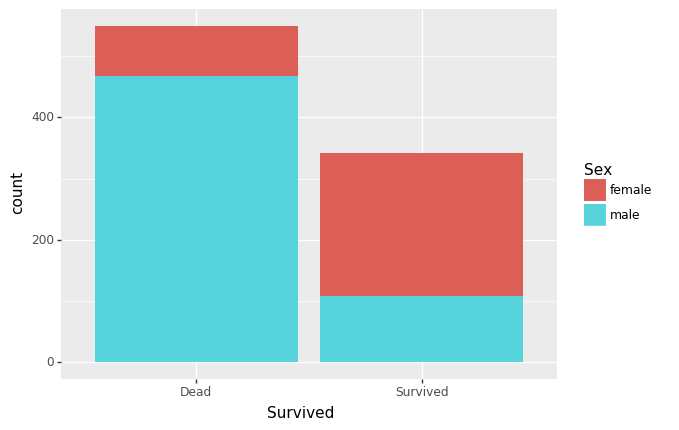

<ggplot: (7009145221)>


In [24]:
from plotnine import *
plt_survived_sex = (ggplot(df_titanic, aes(x='Survived', fill = 'Sex')))
plt_survived_sex = plt_survived_sex + geom_bar()
print(plt_survived_sex)

Observation:
1. More females survived than males
2. More males died than females

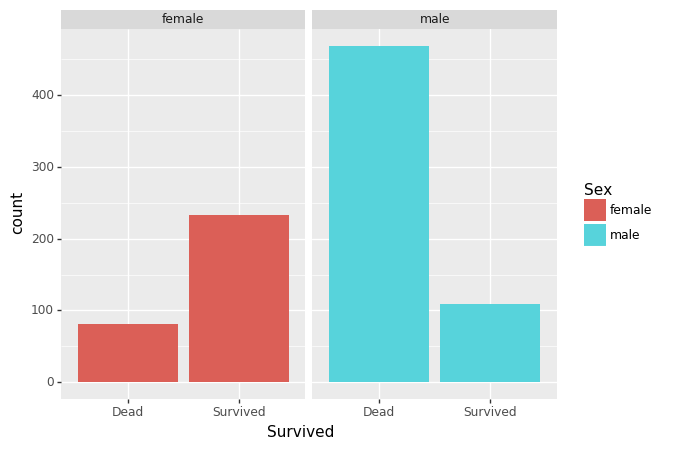

<ggplot: (7011305865)>


In [25]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_wrap('~Sex')
print(plt_survived_sex)

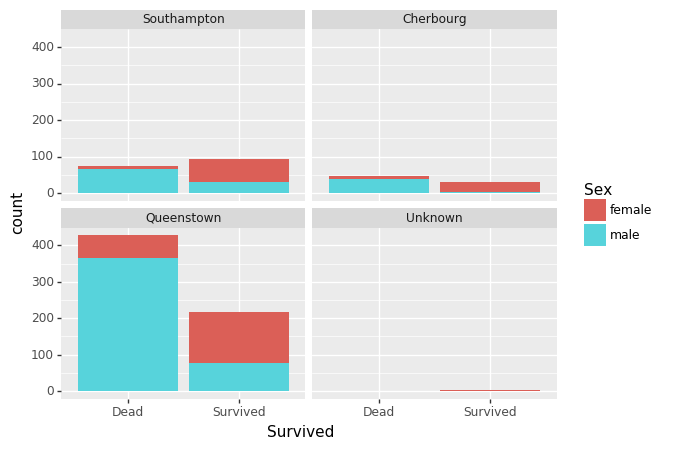

<ggplot: (7011346597)>


In [26]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_wrap('~Embarked')
print(plt_survived_sex)

Observations:
1. Maximum number of people embarked from Queenstown followed by Southampton followed by Cherburg.
2. Number of people who survived from Southampton more than number of people who died.

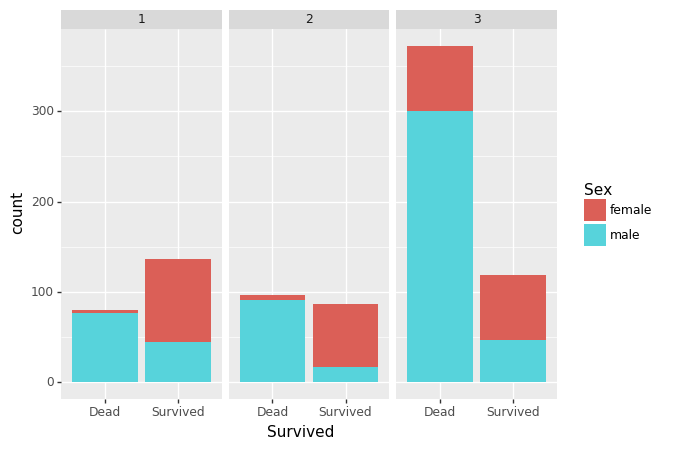

<ggplot: (7008773817)>


In [27]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_wrap('~Pclass')
print(plt_survived_sex)

Observations:
1. Most number of people dead or survived were in Class 3. More dead than survived. More males dead than females.
2. More people survived than died in Class 1. More females survived than males. 


In [28]:
## Most dead in Class 3 and embarked from Queenstown? Did most poeple who were in class 3 embark from Queenstown?

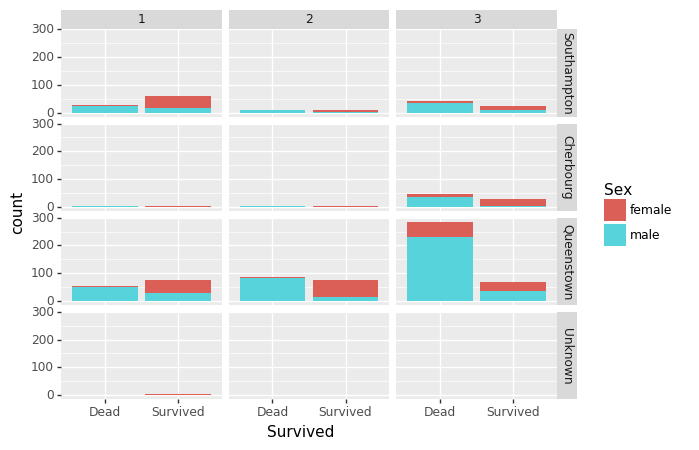

<ggplot: (7011907141)>


In [29]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_grid('Embarked ~ Pclass')
print(plt_survived_sex)

Observation:
1. Most people who died embarked from Queenstown and were in Class 3.

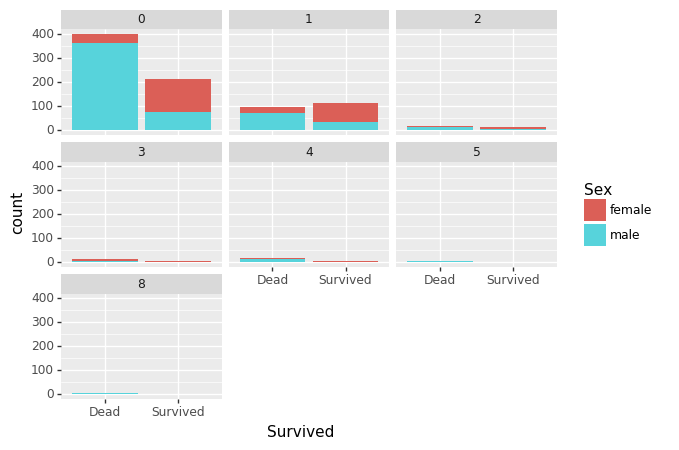

<ggplot: (7012209517)>


In [30]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_wrap('~SibSp')
print(plt_survived_sex)

Observation:
1. Most dead had no siblings or spouses.
2. More survived than dead with spouse or one sibling.

In [31]:
# Which class were msot people with siblings or spouses in?

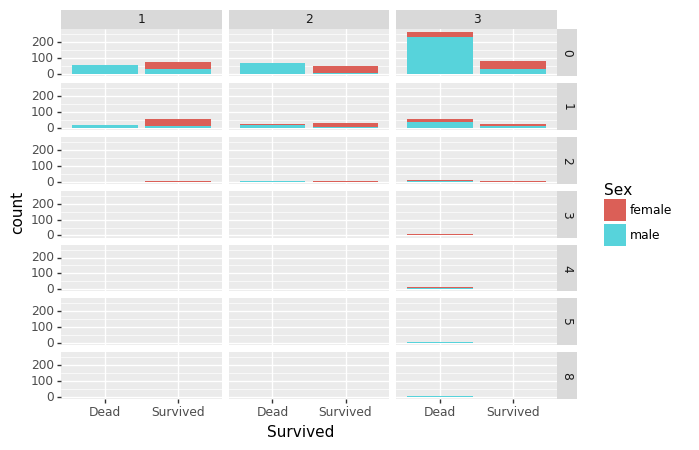

<ggplot: (7012522073)>


In [32]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_grid('SibSp ~ Pclass')
print(plt_survived_sex)

Observation:
1. Most people who were single or by themseves were in class 3. 
2. People with more than two siblings were in class 3 and died.

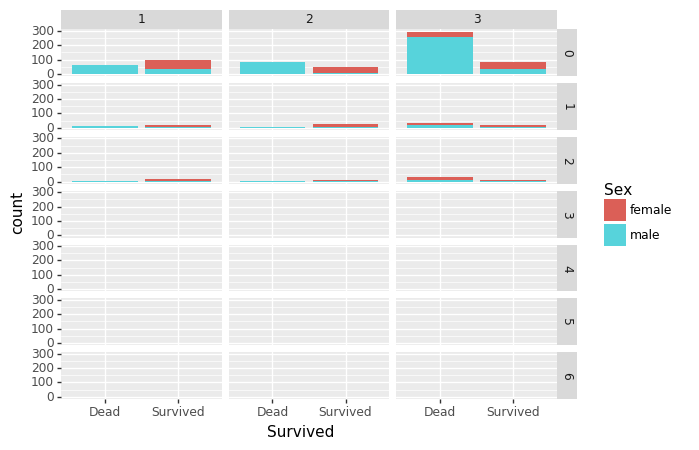

<ggplot: (7012832913)>


In [33]:
plt_survived_sex = plt_survived_sex + geom_bar() + facet_grid('Parch ~ Pclass')
print(plt_survived_sex)

In [34]:
df_titanic[df_titanic['Parch'] >2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,Dead,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,Queenstown
25,26,Survived,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,Queenstown
86,87,Dead,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,Queenstown
167,168,Dead,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,Queenstown
360,361,Dead,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,Queenstown
437,438,Survived,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,Queenstown
438,439,Dead,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,Queenstown
567,568,Dead,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,Queenstown
610,611,Dead,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,Queenstown
638,639,Dead,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,Queenstown


In [35]:
## Question - any way to annotate numbers on the graph so I can read the smaller values better?
## Question - can facet grid take more than three two variables?

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


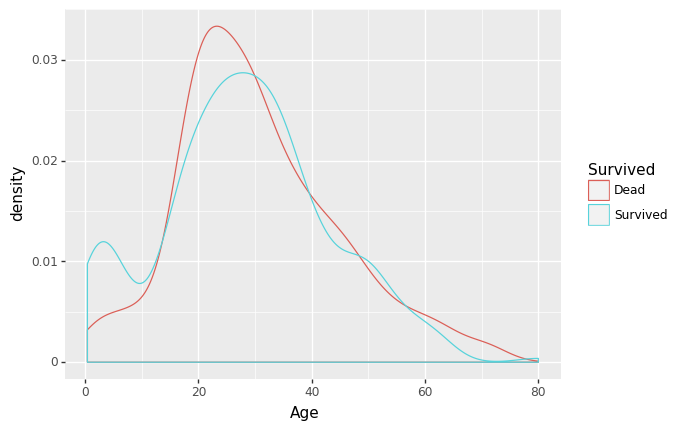

<ggplot: (7013423833)>


In [36]:
plt_survived_age = ggplot(df_titanic, aes(x = 'Age', color = 'Survived'))
plt_survived_age = plt_survived_age + geom_density()
print(plt_survived_age)

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.
/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


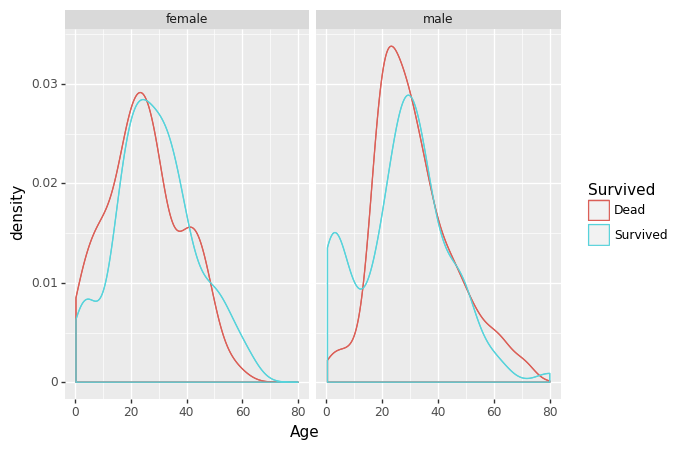

<ggplot: (7012518637)>


In [37]:
plt_survived_age = plt_survived_age + geom_density() + facet_wrap('~Sex')
print(plt_survived_age)

/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.
/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.
/Users/remyabalakrishnan/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.


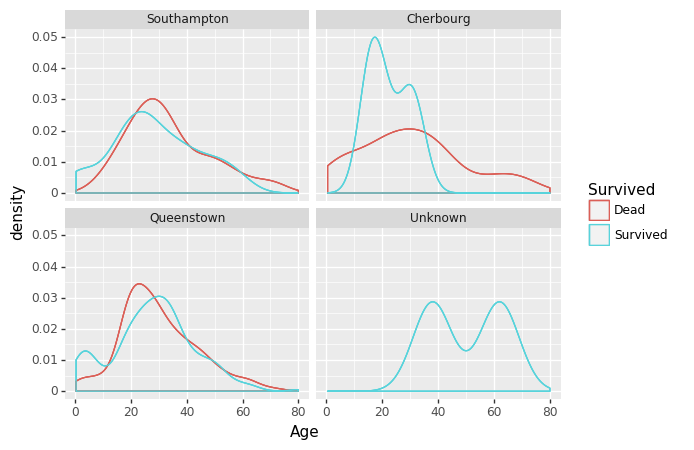

<ggplot: (7012202889)>


In [38]:
plt_survived_age = plt_survived_age + geom_density() + facet_wrap('~Embarked')
print(plt_survived_age)

In [39]:
df_titanic['AgeType'] = np.where(df_titanic['Age'] >= 10, 'Adult','Child')

In [40]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeType
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Queenstown,Adult
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Southampton,Adult
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Queenstown,Adult
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Queenstown,Adult
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Queenstown,Adult


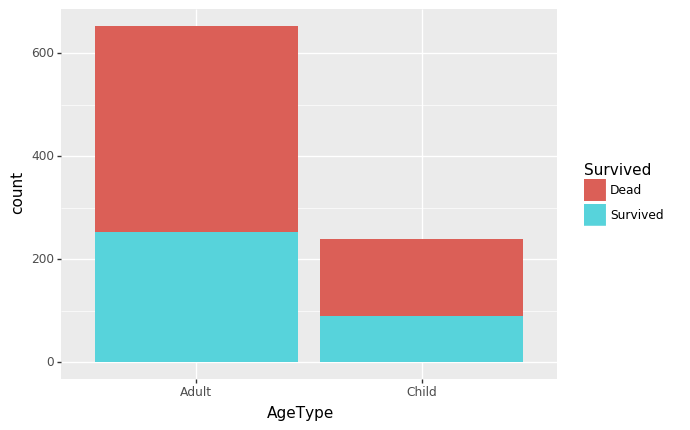

<ggplot: (7012357681)>


In [41]:
plt_Surivived_Agetype = (ggplot(df_titanic, aes (x = 'AgeType', fill = 'Survived')))
plt_Surivived_Agetype = plt_Surivived_Agetype + geom_bar()
print(plt_Surivived_Agetype)

Observation:
1. Adult and children - more dead than survived - Question???

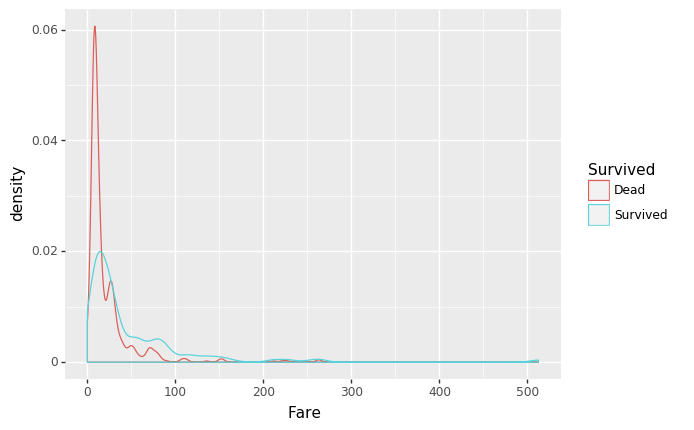

<ggplot: (7012358817)>


In [42]:
plt_surviv_fare = ggplot(df_titanic, aes(x = 'Fare', color = 'Survived'))
plt_surviv_fare = plt_surviv_fare + geom_density()
print(plt_surviv_fare)

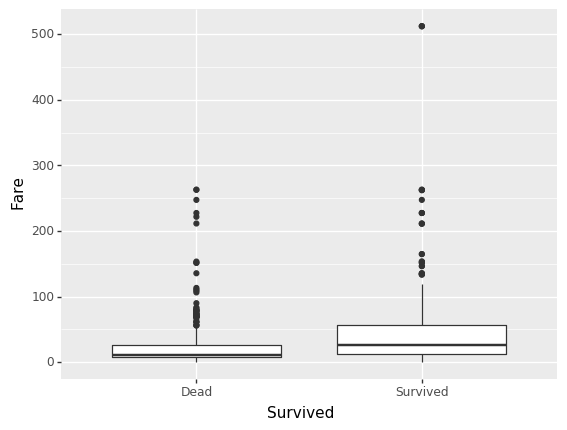

<ggplot: (7012353529)>


In [43]:
plt_surviv_fare = ggplot(df_titanic, aes(x = 'Survived', y = 'Fare'))
plt_surviv_fare = plt_surviv_fare + geom_boxplot()
print(plt_surviv_fare)

In [ ]:
plt_Surivived_Pc = (ggplot(df_titanic, aes (x = 'AgeType', fill = 'Survived')))
plt_Surivived_Agetype = plt_Surivived_Agetype + geom_bar()
print(plt_Surivived_Agetype)